# Preprocessing of Magnetic Resonance Imaging (MRI) Data

# 1) Structural Preprocessing

## What types of scans constitute structrual images?
### A) T1-weighted
### B) T2-weighted
### C) Diffusion-weighted
### D) Proton Density
### E) Confugal
### F) T2*-weighted
### G) All of the above

In [3]:
# Import some packages
import nibabel as nib
import os
import matplotlib.pyplot as plt
import numpy as np
from nilearn.plotting import plot_anat, plot_roi
from nilearn.masking import apply_mask
from IPython.display import Image

%matplotlib inline 

# make a useful function for plotting
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices), figsize=(12,12))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")     

In [23]:
t1_img = nib.load(os.path.join(os.getcwd(), 't1', 'orig.nii.gz'))
t1_img_data = t1_img.get_data()
print("Dimensions of T1-weighted data")
print(t1_img_data.shape)

Dimensions of T1-weighted data
(256, 256, 256)


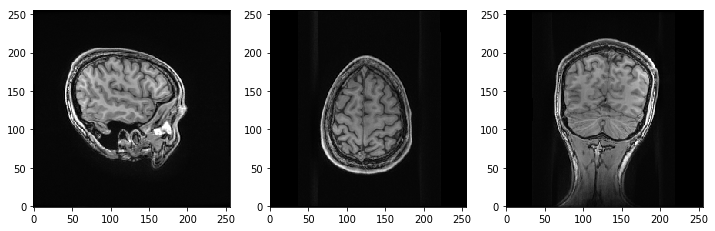

In [27]:
# What would replace the '??'
# Why?
# Run this cell a couple times selecting different numbers.  What do you notice?
t1_slice_0 = np.rot90(t1_img_data[80, :, :], k=3, axes=(0, 1))
t1_slice_1 = t1_img_data[:, 60, :]
t1_slice_2 = np.rot90(t1_img_data[:, :, 70], k=2, axes=(0, 1))
show_slices([t1_slice_0, t1_slice_1, t1_slice_2])
plt.show()

# Bias Field Correction

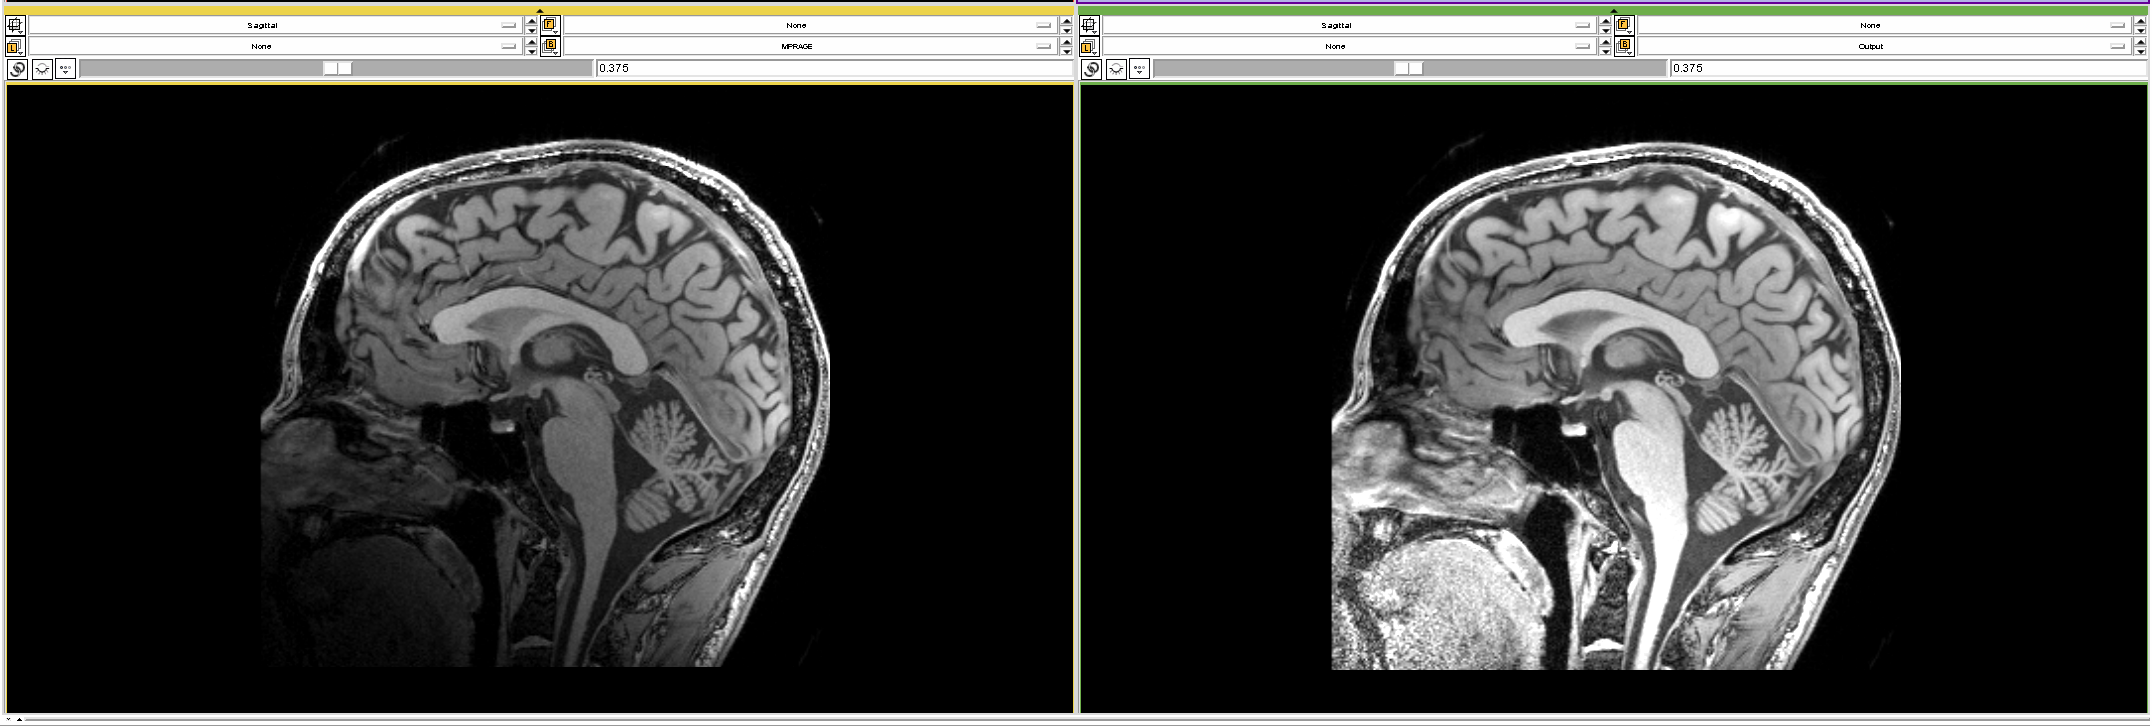

In [4]:
Image("https://www.slicer.org/w/images/7/77/MRI_Bias_Field_Correction_Slicer3_close_up.png")

## What do you notice that is different?  Similar?

# Skull-stripping

[0 1]


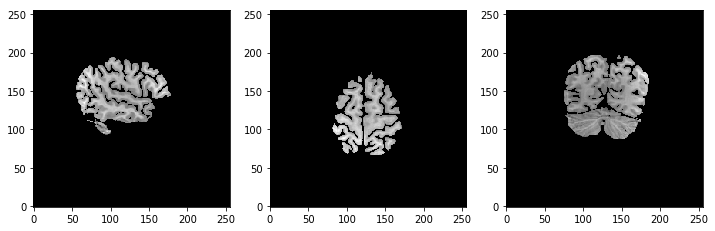

In [35]:
# Here you are loading a mask file
# What do you replace the '???' with?
# Be able to explain why?
# What else is missing here?
t1_mask_img = nib.load(os.path.join(os.getcwd(), 'mask', 't1_mask.nii.gz'))
t1_mask_img_data = t1_mask_img.get_data()
t1_b0_img_data = t1_img_data * t1_mask_img_data

t1_b0_slice_0 = np.rot90(t1_b0_img_data[80, :, :], k=3, axes=(0, 1))
t1_b0_slice_1 = t1_b0_img_data[:, 60, :]
t1_b0_slice_2 = np.rot90(t1_b0_img_data[:, :, 70], k=2, axes=(0, 1))
show_slices([t1_b0_slice_0, t1_b0_slice_1, t1_b0_slice_2])
plt.show()

# FreeSurfer (https://surfer.nmr.mgh.harvard.edu/)
## Surface reconstruction
## Cortical and subcortical parcellation

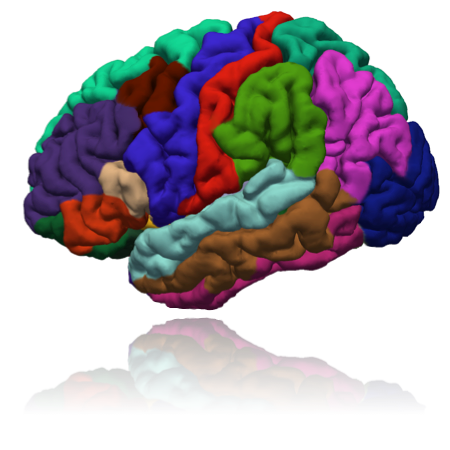

In [7]:
Image("https://surfer.nmr.mgh.harvard.edu/fscortex.png")

# Advanced Normalization Tools (https://github.com/ANTsX/ANTs)
## Computational neuroanatomy 

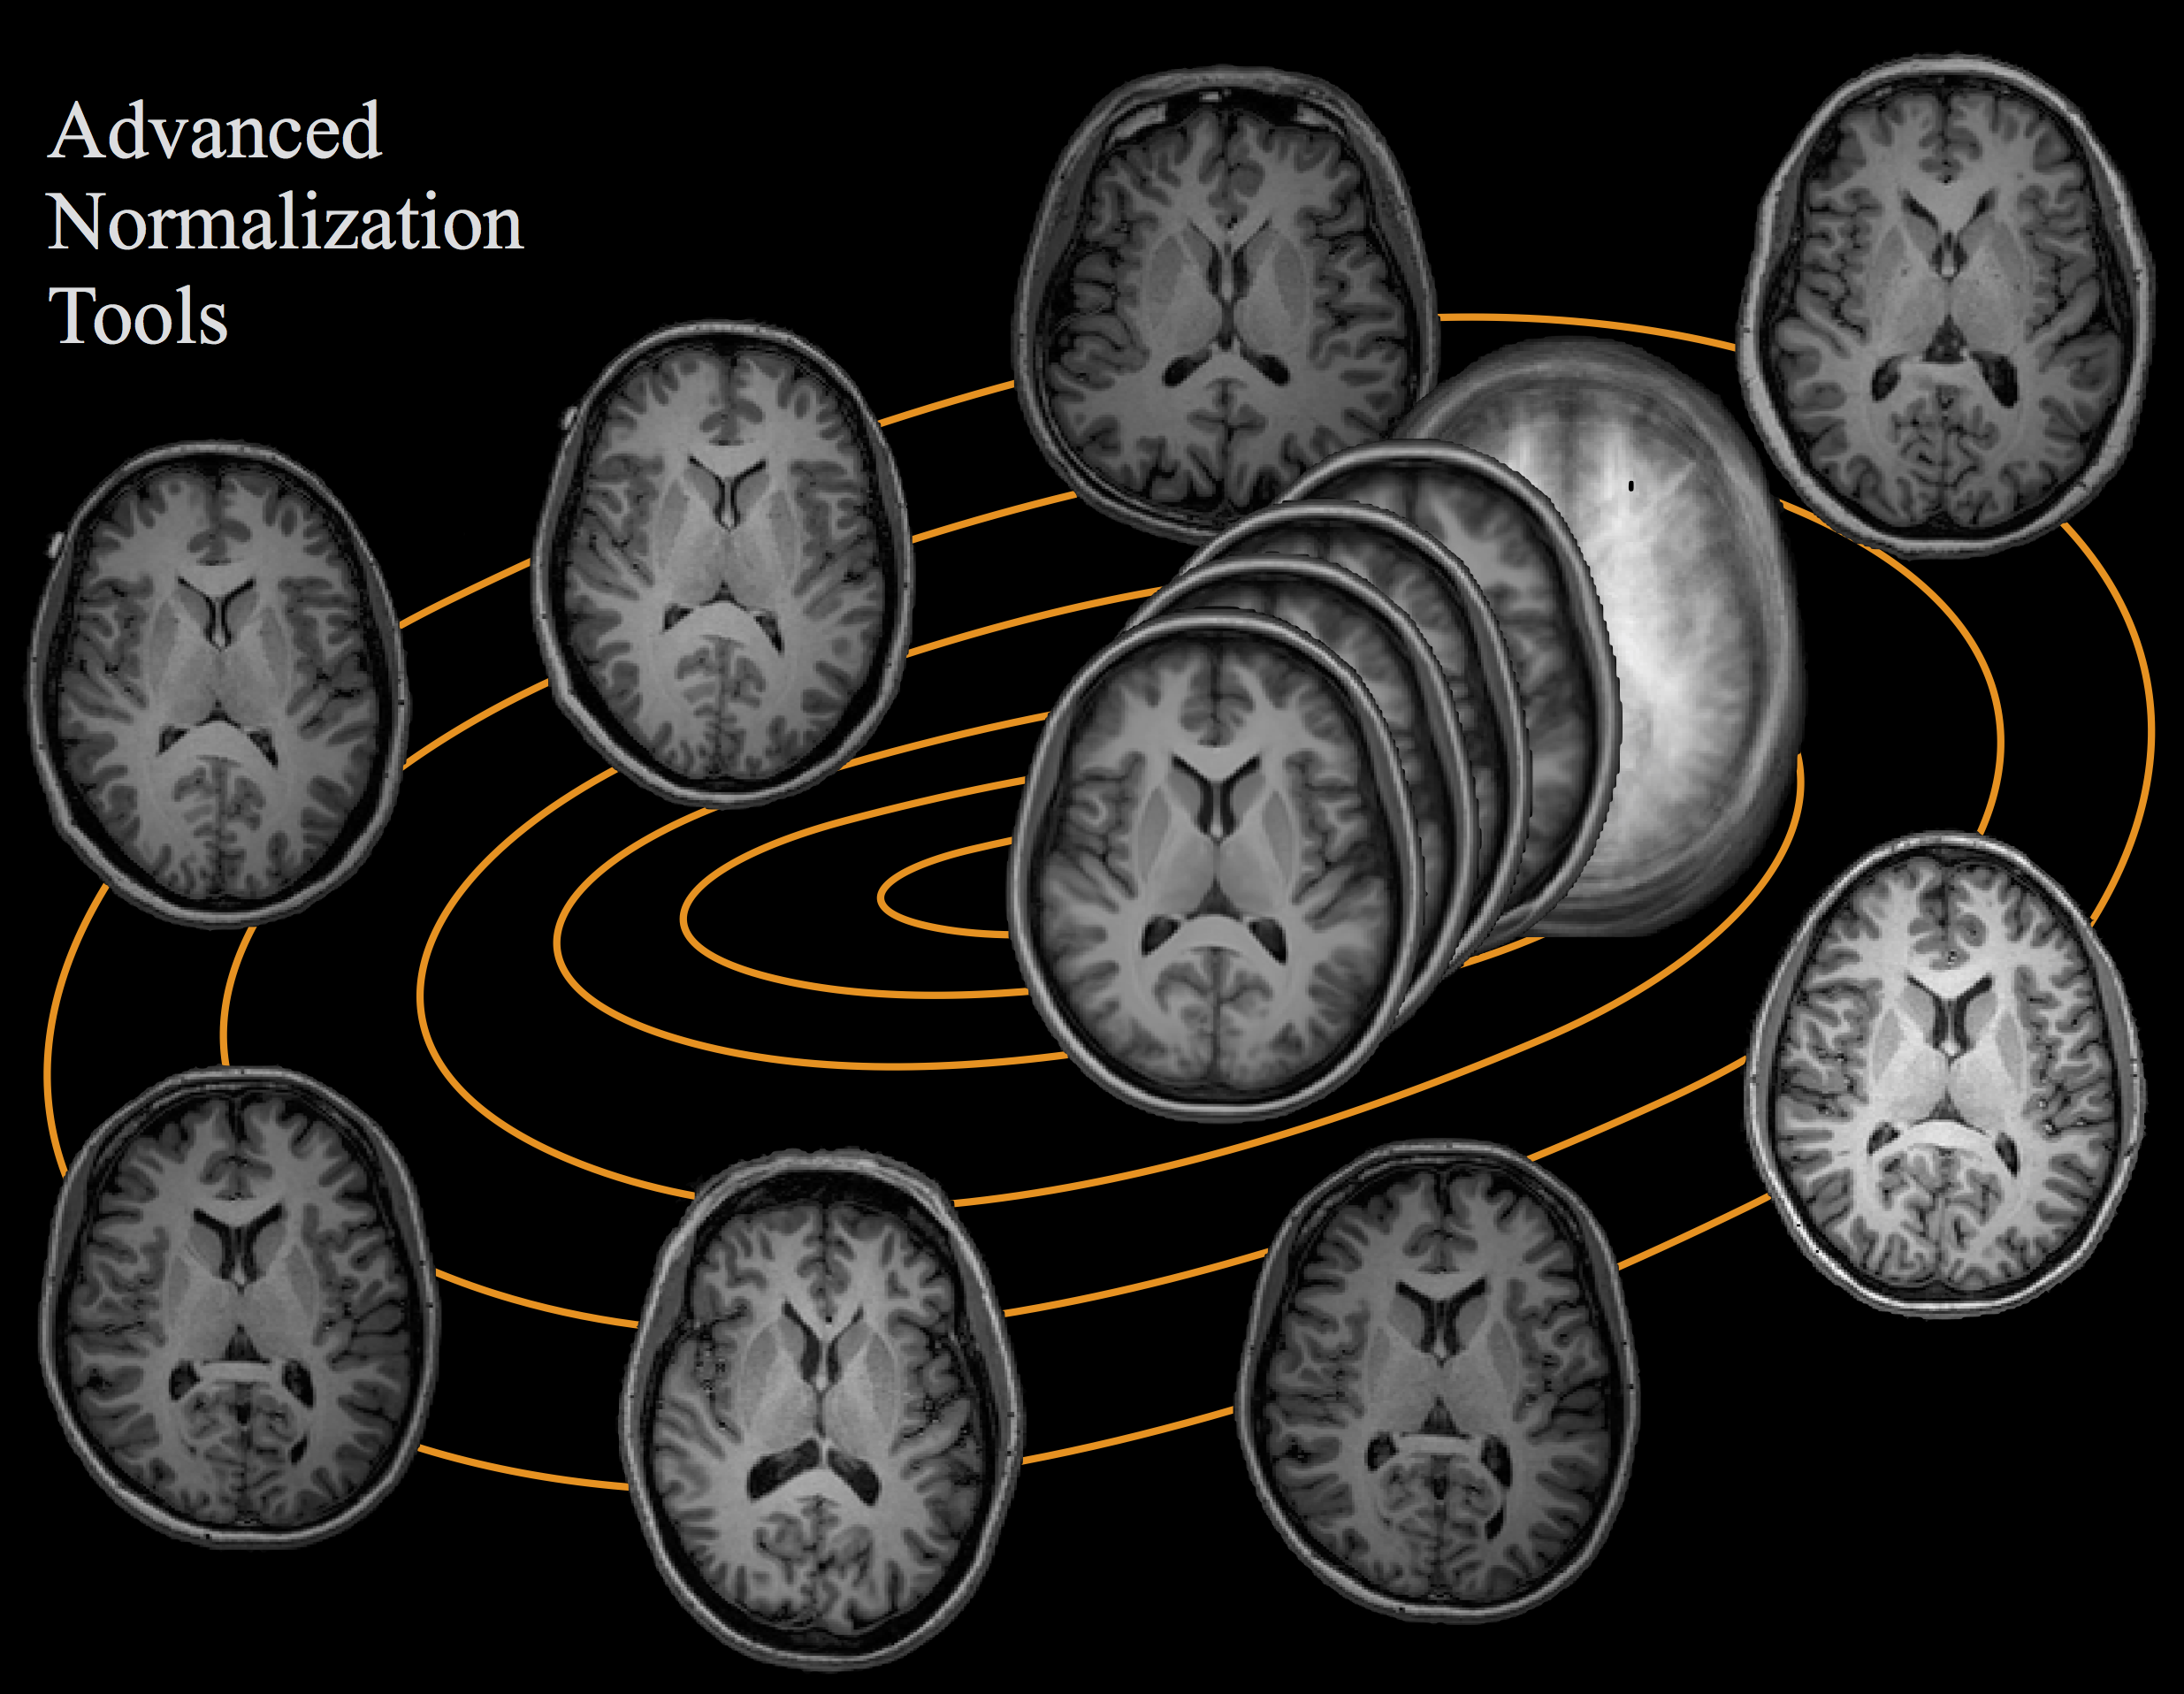

In [8]:
Image("http://www.biii.eu/sites/default/files/2018-01/ants_logo.png")

## Why or when would you want to use just a surface based method?  
## What about a volume based method?  
## What are the pros and cons of each?

# 2) BOLD Preprocessing

In [9]:
# Use this cell to load and view the BOLD data available to you.
bold_img = nib.load(os.path.join(os.getcwd(), 'bold', 'bold.nii.gz'))
bold_img_data = bold_img.get_data()
print("Dimensions of BOLD data")
print(bold_img_data.shape)

Dimensions of BOLD data
(96, 96, 42, 200)


## What do you notice that is different?  
## Similar?

## A) Motion Correction

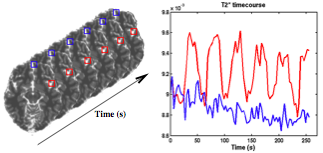

In [10]:
Image("http://web.mit.edu/fsl_v5.0.10/fsl/doc/wiki/attachments/POSSUM(2f)UserGuide/activation.png")

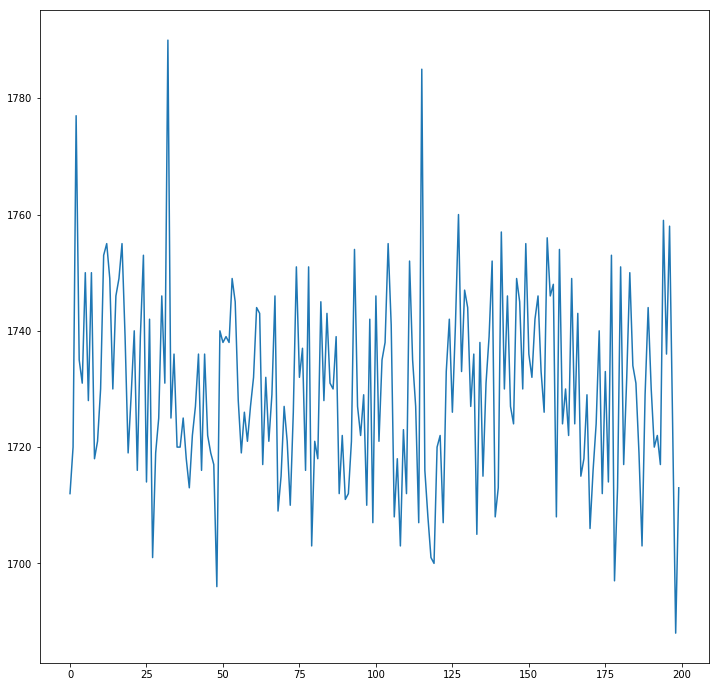

In [11]:
# Plot out time series from single voxel
# What do we note about this data?
# How would motion affect it?
# Would it be the same everywhere?
fig, axes = plt.subplots(1, 1, figsize=(12,12))
t = np.arange(0, bold_img_data.shape[-1], 1)
axes.plot(t, bold_img_data[44,44, 23,:])
plt.show()

In [12]:
# One algorithm for performing motion correction
from nipype.interfaces import fsl

mcflt = fsl.MCFLIRT()
mcflt.inputs.in_file = os.path.join(os.getcwd(), 'bold', 'bold.nii.gz')
mcflt.inputs.cost = 'mutualinfo'
mcflt.inputs.out_file = os.path.join(os.getcwd(), 'bold', 'moco.nii.gz')
mcflt.run()

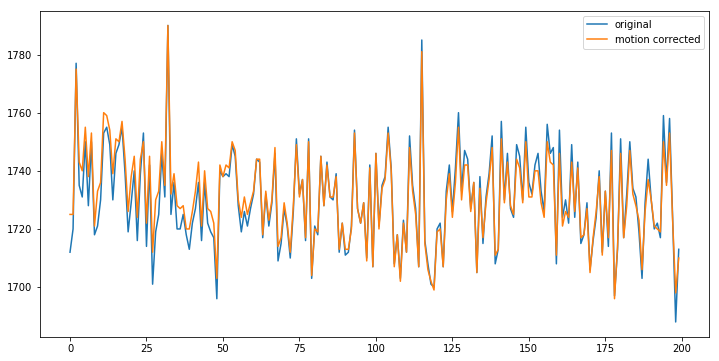

In [12]:
# Load in the motion correction (moco) image by replacing the ???
moco_img = nib.load(os.path.join(os.getcwd(), 'bold', 'moco.nii.gz'))
moco_img_data = moco_img.get_data()

fig, axes = plt.subplots(1, 1, figsize=(12,6))
t = np.arange(0, bold_img_data.shape[-1], 1)
axes.plot(t, bold_img_data[44,44, 23,:], label='original')
axes.plot(t, moco_img_data[44,44, 23,:], label='motion corrected')
plt.legend()
plt.show()

## B) Slice Timing Correction

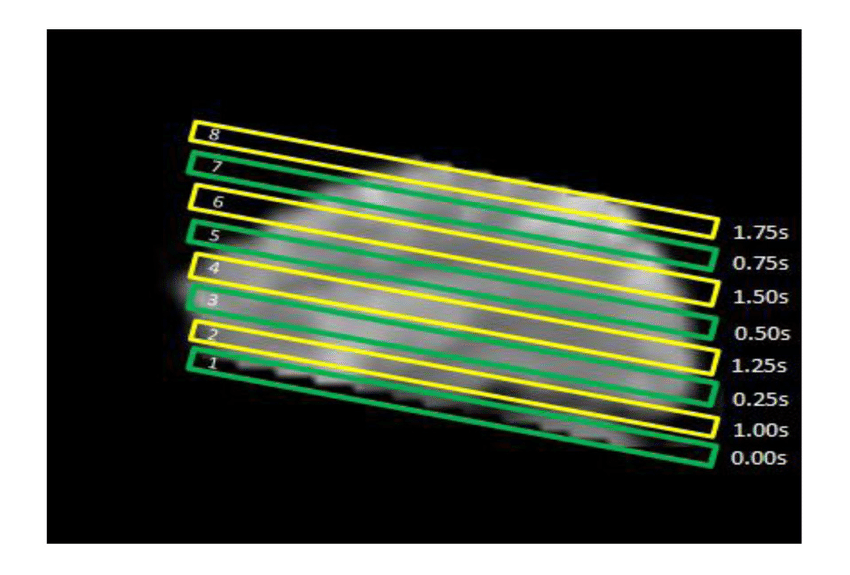

In [25]:
Image("https://www.researchgate.net/profile/Mehdi_Behroozi/publication/282051206/figure/fig3/AS:425711996542981@1478509057925/A-depiction-of-slice-timing-in-an-interleaved-MRI-acquisition-The-slices-are-acquired-in.png")

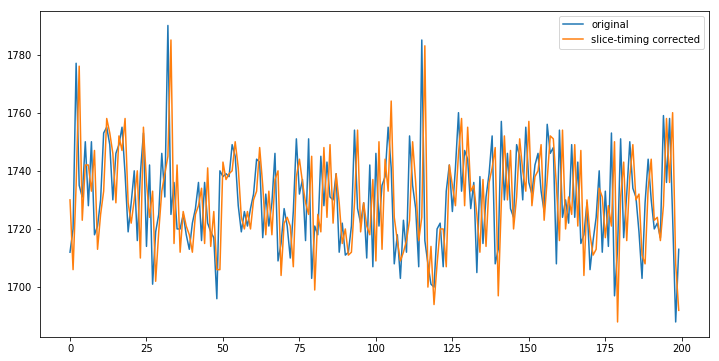

In [24]:
# Load in the slice time corrected image by replacing the ???
stcorr_img = nib.load(os.path.join(os.getcwd(), 'bold', 'slicetime.nii.gz'))
stcorr_img_data = stcorr_img.get_data()

fig, axes = plt.subplots(1, 1, figsize=(12,6))
t = np.arange(0, bold_img_data.shape[-1], 1)
axes.plot(t, bold_img_data[44,44, 23,:], label='original')
axes.plot(t, stcorr_img_data[44,44, 23,:], label='slice-timing corrected')
plt.legend()
plt.show()

## C) Coregistration

## D) Spatial Smoothing
## Why would we spatially smooth or average the data?
## Pros?
## Cons?

In [ ]:
# Use this cell to load and view the spatially smoothed BOLD data

## Does the data look different? How? Why?
## Try running the cell again with a smaller sigma, what do you think will happen?  Larger?

## Attempts are being made to standardize preprocessing through the implementation of tools such as fmriprep (https://fmriprep.readthedocs.io)

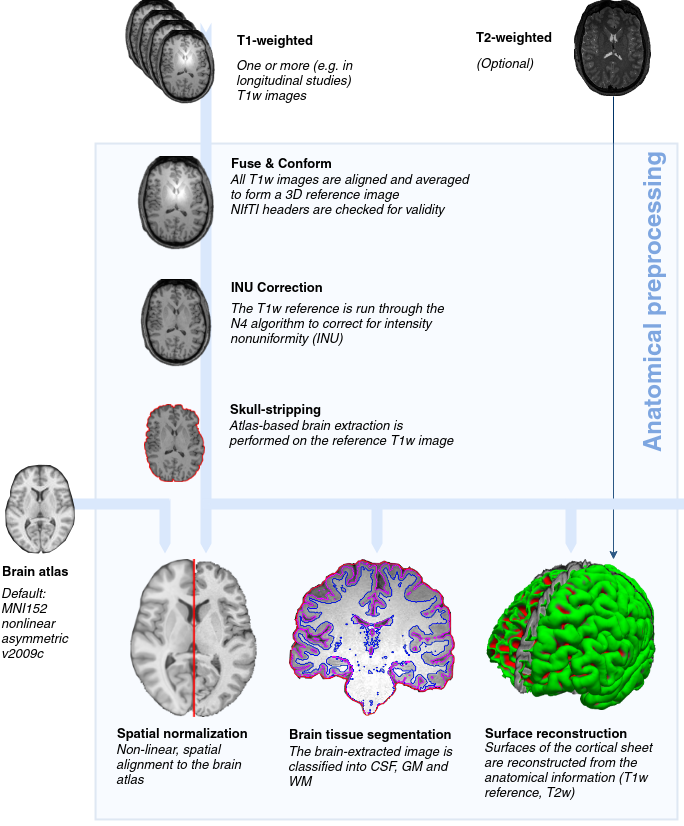

In [63]:
Image("fmriprep_anat.png")

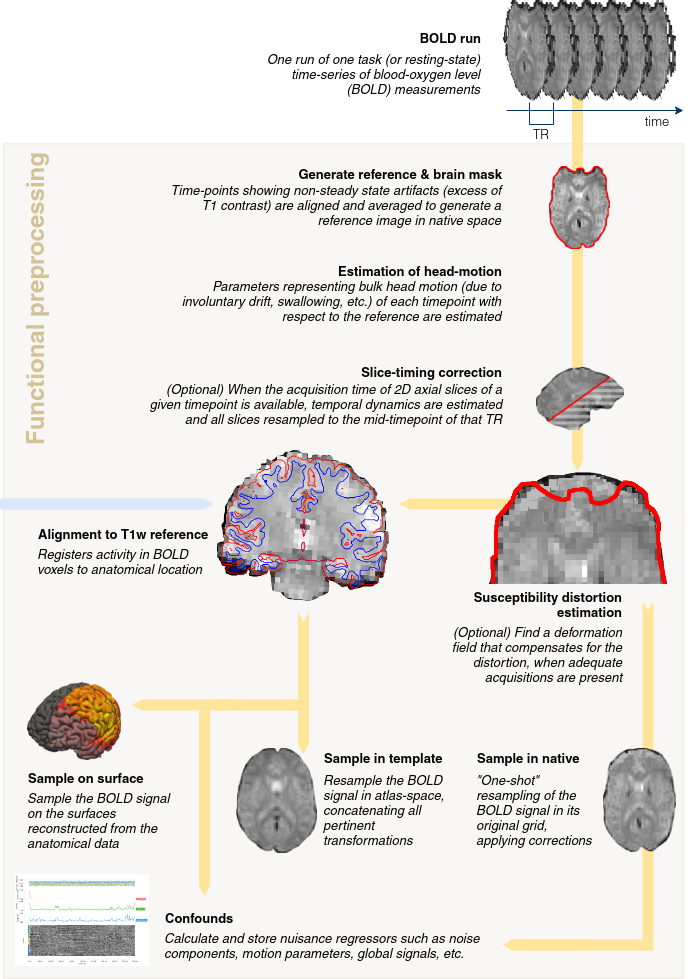

In [64]:
Image("fmriprep_func.png")

### Why use fMRIPrep?

## Transparency, Replicability, Version-control